### Creating control mouse dataset:
#### 20220714: 1197_1202,1198_1200
#### 20220715:1204_1206
#### 20220728: 1240_1241
#### 20220729:1247_1248,1245_1246

In [104]:
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os
import matplotlib.pyplot as plt
%matplotlib inline

### first let's create sociability dataset for control mouse (n=12)

In [105]:
file_1197_1202 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220714_sociabilitytest_1197_1201 Video 1 7_14_2022 11_22_29 AM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")
file_1198_1200 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220714_sociabilitytest_1200_1198 Video 1 7_14_2022 10_00_51 AM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")
file_1204_1206 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220715_sociabilitytest_1204_1206 Video 1 7_15_2022 3_49_03 PM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")
file_1240_1241 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220728_sociabilitytest_1241_1240 Video 1 7_28_2022 1_41_26 PM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")
file_1247_1248 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220728_sociabilitytest_1248_1247 Video 1 7_29_2022 10_28_47 AM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")
file_1245_1246 = pd.read_hdf("C:/Users/shd-skou-circuit/Desktop/muscimol_male_maDLC-Bernadett-2023-03-20/videos/20220728_sociabilitytest_1246_1245 Video 1 7_29_2022 11_52_36 AM 1DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000_el.h5")

In [106]:
#file=file.dropna()
file_1197_1202

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
0                                                      537.939    377.079   
1                                                      537.977    386.375   
2                                                      541.027    394.912   
3                                                      539.335    401.692   
4                                                      542.060    407.048   
...                                                        ...        ...   
8744                                                   757.748    636.857   
8745                                                   770.230    631.597   
8746                                                   772.354    618.694   
8747                                                   775.547    604.156   
8748                                                   772.399    593.160   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
0                  1.0  532.594  360.690        1.0  555.324  368.770   
1                  1.0  535.091  366.860        1.0  552.864  366.121   
2                  1.0  534.552  374.336        1.0  555.599  380.216   
3                  1.0  535.655  388.156        1.0  549.234  386.318   
4                  1.0  535.436  392.177        1.0  553.615  398.361   
...                ...      ...      ...        ...      ...      ...   
8744               1.0  751.265  652.529        1.0  742.534  637.788   
8745               1.0  763.573  647.756        1.0  754.434  631.756   
8746               1.0  763.471  635.176        1.0  754.237  623.019   
8747               1.0  763.835  622.545        1.0  755.544  607.791   
8748               1.0  766.573  614.683        1.0  761.140  599.207   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
0                  1.0  539.414  ...         1.0  555.609  903.729        1.0   
1                  1.0  541.297  ...         1.0  543.986  908.934        1.0   
2                  1.0  539.652  ...         1.0  533.256  910.274        1.0   
3                  1.0  541.016  ...         1.0  527.932  910.814        1.0   
4                  1.0  540.508  ...         1.0  523.860  905.328        1.0   
...                ...      ...  ...         ...      ...      ...        ...   
8744               1.0  735.320  ...         1.0  673.010  138.879        1.0   
8745               1.0  751.594  ...         1.0  674.040  139.462        1.0   
8746               1.0  757.396  ...         1.0  673.378  138.828        1.0   
8747               1.0  757.173  ...         1.0  671.531  137.552        1.0   
8748               1.0  761.835  ...         1.0  671.407  136.993        1.0   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
0            568.515  881.076        1.0  560.712  846.227        1.0  
1            560.515  893.058        1.0  560.219  856.942        1.0  
2            553.988  903.931        1.0  559.719  870.630        1.0  
3            548.504  903.34

#### we don't need the first 30 seconds for the analysis so we cut it out, and we drop the non values as well, to get a clear data

In [107]:
frame_rate = 13.88  
max_time = 30 
frames_to_cut = int(frame_rate * max_time)
frames_to_cut

416

In [108]:
file_1197_1202=file_1197_1202.iloc[frames_to_cut:]
file_1198_1200=file_1198_1200.iloc[frames_to_cut:]
file_1204_1206=file_1204_1206.iloc[frames_to_cut:]
file_1240_1241=file_1240_1241.iloc[frames_to_cut:]
file_1247_1248=file_1247_1248.iloc[frames_to_cut:]
file_1245_1246=file_1245_1246.iloc[frames_to_cut:]

In [109]:
file_1197_1202=file_1197_1202.dropna()
file_1198_1200=file_1198_1200.dropna()
file_1204_1206=file_1204_1206.dropna()
file_1240_1241=file_1240_1241.dropna()
file_1247_1248=file_1247_1248.dropna()
file_1245_1246=file_1245_1246.dropna()

In [110]:
dataframes_O_FM=[file_1197_1202,file_1240_1241,file_1245_1246]
dataframes_FM_O=[file_1198_1200,file_1204_1206,file_1247_1248]
sociability_control_O_FM = pd.concat(dataframes_O_FM, ignore_index=False)
sociability_control_FM_O = pd.concat(dataframes_FM_O, ignore_index=False)

Since we want to see the number of different postures (normal, elongated, shrunk) for sociability in object and familiar zone we want to create "object zone and familiar mouse zone" datasets. During the experiments we tried to exclude the side preferance of the mice so we changed the side of the object and familiar zones. There are 6 mice where the object zone is in the left chamber and the familiar mouse is in the right chamber, and 6 mice where the familiar mouse is in the left chamber and the object in the right chamber.

In [111]:
sociability_control_O_FM #object on the left , mouse in the right chamber

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
416                                                    267.554    167.075   
417                                                    271.671    173.877   
418                                                    280.782    183.512   
419                                                    280.230    192.053   
420                                                    280.697    195.842   
...                                                        ...        ...   
8733                                                   504.271    708.515   
8734                                                   505.621    715.586   
8735                                                   501.912    708.315   
8736                                                   499.469    710.385   
8737                                                   499.312    717.167   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
416                1.0  251.061  157.128        1.0  271.225  153.138   
417                1.0  255.826  163.269        1.0  275.001  159.167   
418                1.0  263.727  170.383        1.0  284.074  168.739   
419                1.0  268.646  178.910        1.0  285.137  177.277   
420                1.0  269.281  184.577        1.0  289.293  172.845   
...                ...      ...      ...        ...      ...      ...   
8733               1.0  501.398  726.457        1.0  484.773  715.830   
8734               1.0  501.198  727.611        1.0  482.846  714.439   
8735               1.0  500.300  726.805        1.0  481.222  715.784   
8736               1.0  499.547  727.491        1.0  477.505  718.406   
8737               1.0  499.239  728.661        1.0  478.156  718.996   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
416                1.0  256.286  ...         1.0  514.012  603.121      1.000   
417                1.0  263.994  ...         1.0  523.135  618.788      1.000   
418                1.0  268.825  ...         1.0  524.455  620.907      1.000   
419                1.0  269.584  ...         1.0  517.134  629.960      1.000   
420                1.0  271.858  ...         1.0  512.079  632.546      1.000   
...                ...      ...  ...         ...      ...      ...        ...   
8733               1.0  486.883  ...         1.0  573.360  281.013      0.999   
8734               1.0  486.804  ...         1.0  571.542  283.167      0.999   
8735               1.0  486.853  ...         1.0  571.980  285.355      0.996   
8736               1.0  486.472  ...         1.0  571.991  285.311      0.992   
8737               1.0  486.845  ...         1.0  571.614  285.487      0.997   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
416          516.619  582.602      1.000  519.315  560.118        1.0  
417          523.618  599.536      1.000  529.834  578.977        1.0  
418          525.476  601.680      1.000  537.970  575.031        1.0  
419          516.415  607.59

In [112]:
sociability_control_FM_O #object on the rigt, mouse in the left chamber

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
480                                                    218.386    600.069   
481                                                    220.583    586.085   
520                                                    326.569    654.265   
521                                                    328.480    658.459   
522                                                    316.212    665.732   
...                                                        ...        ...   
8742                                                   645.220    711.460   
8743                                                   648.764    710.742   
8744                                                   651.790    707.122   
8745                                                   649.401    706.887   
8746                                                   647.354    708.263   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
480                1.0  222.533  618.370        1.0  203.982  614.046   
481                1.0  225.091  606.814        1.0  206.849  600.057   
520                1.0  319.305  639.676        1.0  334.673  639.062   
521                1.0  314.685  644.857        1.0  332.559  646.603   
522                1.0  307.438  646.126        1.0  327.741  652.904   
...                ...      ...      ...        ...      ...      ...   
8742               1.0  634.421  700.127        1.0  654.011  701.737   
8743               1.0  635.440  699.975        1.0  654.789  699.443   
8744               1.0  638.742  695.892        1.0  654.469  696.319   
8745               1.0  637.949  694.781        1.0  655.909  697.844   
8746               1.0  637.440  697.574        1.0  656.363  698.883   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
480                1.0  207.403  ...         1.0  353.162  297.155      1.000   
481                1.0  214.834  ...         1.0  362.288  283.809      0.967   
520                1.0  322.108  ...         1.0  202.568  391.848      1.000   
521                1.0  320.095  ...         1.0  202.363  391.620      1.000   
522                1.0  316.218  ...         1.0  203.242  393.866      1.000   
...                ...      ...  ...         ...      ...      ...        ...   
8742               1.0  644.220  ...         1.0  439.910  380.745      1.000   
8743               1.0  645.464  ...         1.0  440.444  380.774      1.000   
8744               1.0  647.985  ...         1.0  440.084  380.231      1.000   
8745               1.0  647.791  ...         1.0  440.183  379.852      1.000   
8746               1.0  648.892  ...         1.0  439.916  380.071      1.000   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
480          377.659  305.401      1.000  403.819  295.777      1.000  
481          378.553  294.733      0.989  403.625  299.263      1.000  
520          181.328  405.487      1.000  167.044  377.484      0.999  
521          181.504  405.75

In [113]:
# Select body parts to track
indiv1_bp1 = 'nose'
indiv1_bp2 = 'tailbase'
indiv2_bp1 = 'nose'
indiv2_bp2 = 'tailbase'

# Get position of each body part over time for each individual
indiv1_bp1_x = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1]['x'].values
indiv1_bp1_y = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1]['y'].values
indiv1_bp2_x = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp2]['x'].values
indiv1_bp2_y = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp2]['y'].values
indiv2_bp1_x = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp1]['x'].values
indiv2_bp1_y = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp1]['y'].values
indiv2_bp2_x = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp2]['x'].values
indiv2_bp2_y = sociability_control_FM_O['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp2]['y'].values

<AxesSubplot:ylabel='Count'>

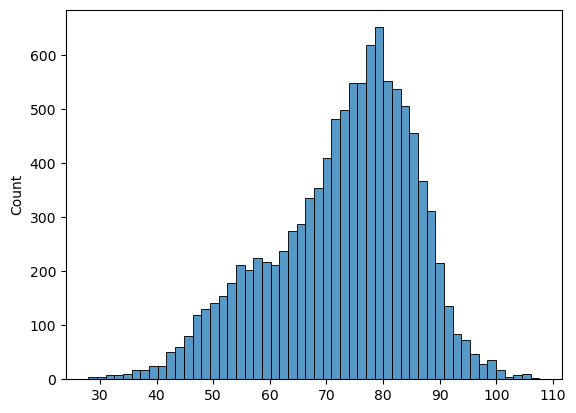

In [114]:
# Calculate distance between body parts over time for each individual
indiv1_dist = np.sqrt((indiv1_bp1_x - indiv1_bp2_x)**2 + (indiv1_bp1_y - indiv1_bp2_y)**2)
indiv2_dist = np.sqrt((indiv2_bp1_x - indiv2_bp2_x)**2 + (indiv2_bp1_y - indiv2_bp2_y)**2)

sns.histplot(data=indiv2_dist)

<AxesSubplot:ylabel='Count'>

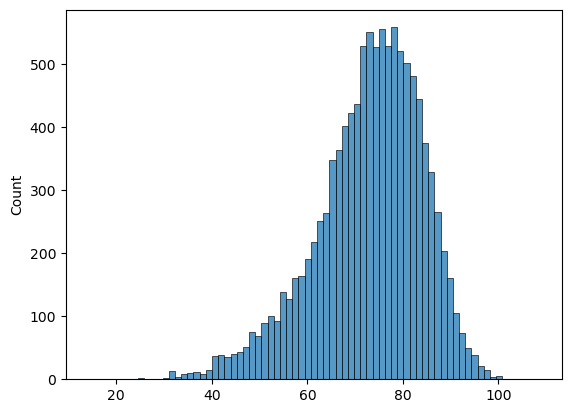

In [115]:
indiv3_bp1 = 'nose'
indiv3_bp2 = 'tailbase'
indiv4_bp1 = 'nose'
indiv4_bp2 = 'tailbase'

# Get position of each body part over time for each individual
indiv3_bp1_x = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv3_bp1]['x'].values
indiv3_bp1_y = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv3_bp1]['y'].values
indiv3_bp2_x = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv3_bp2]['x'].values
indiv3_bp2_y = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv3_bp2]['y'].values
indiv4_bp1_x = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv4_bp1]['x'].values
indiv4_bp1_y = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv4_bp1]['y'].values
indiv4_bp2_x = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv4_bp2]['x'].values
indiv4_bp2_y = sociability_control_O_FM['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv4_bp2]['y'].values

indiv3_dist = np.sqrt((indiv3_bp1_x - indiv3_bp2_x)**2 + (indiv3_bp1_y - indiv3_bp2_y)**2)
indiv4_dist = np.sqrt((indiv4_bp1_x - indiv4_bp2_x)**2 + (indiv4_bp1_y - indiv4_bp2_y)**2)


sns.histplot(data=indiv3_dist)

In [116]:
mean1=np.mean(indiv1_dist)
mean2=np.mean(indiv2_dist)
mean3=np.mean(indiv3_dist)
mean4=np.mean(indiv4_dist)

means=((mean1+mean2+mean3+mean4)/4)
ranges=[means-10,means+10]


In [117]:
ranges

[63.01730552538561, 83.01730552538561]

In [118]:
categories1 = np.zeros(len(indiv1_dist))
for i in range(len(indiv1_dist)):
    if indiv1_dist[i] >= ranges[0] and indiv1_dist[i] <= ranges[1]:
        categories1[i] = 0 # normal posture
    elif indiv1_dist[i] > ranges[1]:
        categories1[i] = 1 # elongated
    else:
        categories1[i] = -1 # shrunk

categories2 = np.zeros(len(indiv2_dist))
for i in range(len(indiv2_dist)):
    if indiv2_dist[i] >= ranges[0] and indiv2_dist[i] <= ranges[1]:
        categories2[i] = 0 # normal posture
    elif indiv2_dist[i] > ranges[1]:
        categories2[i] = 1 # elongated
    else:
        categories2[i] = -1 # shrunk

categories3 = np.zeros(len(indiv3_dist))
for i in range(len(indiv2_dist)):
    if indiv3_dist[i] >= ranges[0] and indiv3_dist[i] <= ranges[1]:
        categories3[i] = 0 # normal posture
    elif indiv3_dist[i] > ranges[1]:
        categories3[i] = 1 # elongated
    else:
        categories3[i] = -1 # shrunk

categories4 = np.zeros(len(indiv4_dist))
for i in range(len(indiv4_dist)):
    if indiv4_dist[i] >= ranges[0] and indiv4_dist[i] <= ranges[1]:
        categories4[i] = 0 # normal posture
    elif indiv4_dist[i] > ranges[1]:
        categories4[i] = 1 # elongated
    else:
        categories4[i] = -1 # shrunk

In [119]:
# Count the number of data points in each category
normal1 = np.sum(categories1 == 0)
elongated1 = np.sum(categories1 == 1)
shrunk1 = np.sum(categories1 == -1)

normal2 = np.sum(categories2 == 0)
elongated2 = np.sum(categories2 == 1)
shrunk2 = np.sum(categories2 == -1)

normal3 = np.sum(categories3 == 0)
elongated3 = np.sum(categories3 == 1)
shrunk3 = np.sum(categories3 == -1)

normal4 = np.sum(categories4 == 0)
elongated4 = np.sum(categories4 == 1)
shrunk4 = np.sum(categories4 == -1)

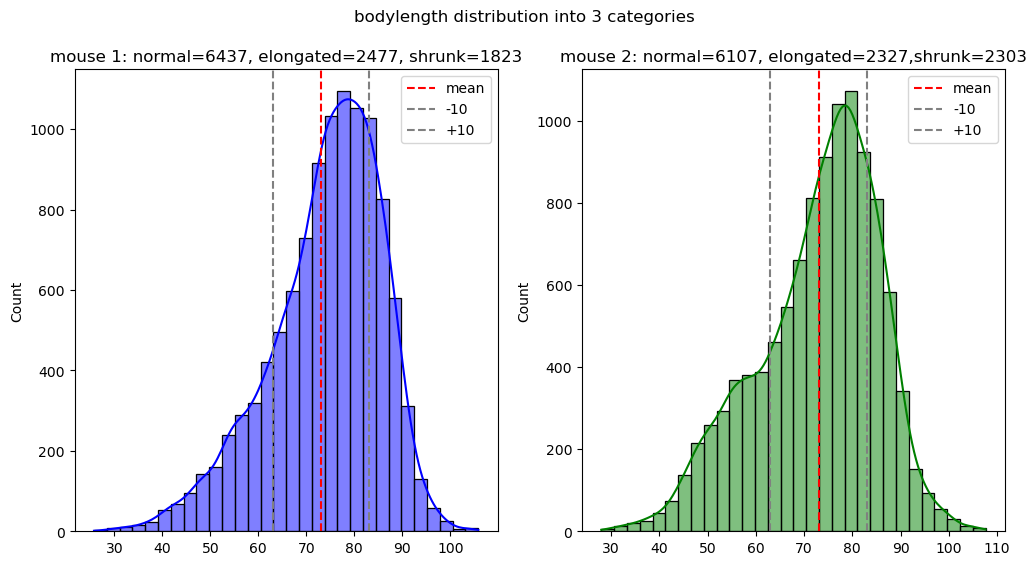

In [120]:
# Plot the histograms
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.histplot(data=indiv1_dist, bins=30, kde=True, color='blue', ax=axs[0])
sns.histplot(data=indiv2_dist, bins=30, kde=True, color='green', ax=axs[1])

axs[0].axvline(means, color='red', linestyle='--', label='mean')
axs[0].axvline(ranges[0], color='gray', linestyle='--', label='-10')
axs[0].axvline(ranges[1], color='gray', linestyle='--', label='+10')
axs[0].legend()

axs[1].axvline(means, color='red', linestyle='--', label='mean')
axs[1].axvline(ranges[0], color='gray', linestyle='--', label='-10')
axs[1].axvline(ranges[1], color='gray', linestyle='--', label='+10')
axs[1].legend()

fig.suptitle('bodylength distribution into 3 categories')
axs[0].set_title(f'mouse 1: normal={normal1}, elongated={elongated1}, shrunk={shrunk1}')
axs[1].set_title(f'mouse 2: normal={normal2}, elongated={elongated2},shrunk={shrunk2}')

plt.show()


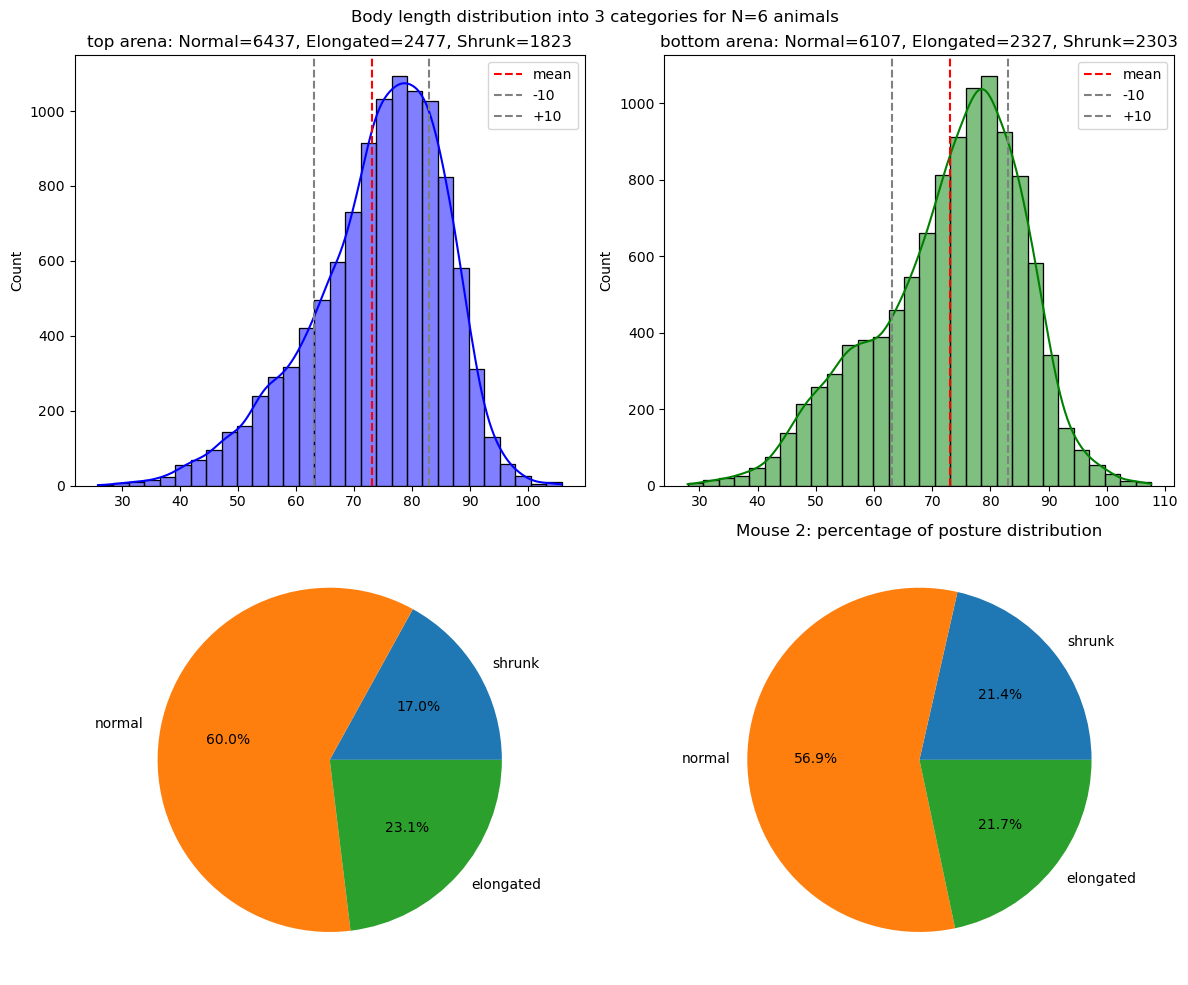

In [121]:
# Count the number of data points in each category
normal1 = np.sum(categories1 == 0)
elongated1 = np.sum(categories1 == 1)
shrunk1 = np.sum(categories1 == -1)

normal2 = np.sum(categories2 == 0)
elongated2 = np.sum(categories2 == 1)
shrunk2 = np.sum(categories2 == -1)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

sns.histplot(data=indiv1_dist, bins=30, kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=indiv2_dist, bins=30, kde=True, color='green', ax=axs[0,1])

axs[0,0].axvline(means, color='red', linestyle='--', label='mean')
axs[0,0].axvline(ranges[0], color='gray', linestyle='--', label='-10')
axs[0,0].axvline(ranges[1], color='gray', linestyle='--', label='+10')
axs[0,0].legend()

axs[0,1].axvline(means, color='red', linestyle='--', label='mean')
axs[0,1].axvline(ranges[0], color='gray', linestyle='--', label='-10')
axs[0,1].axvline(ranges[1], color='gray', linestyle='--', label='+10')
axs[0,1].legend()

fig.suptitle('Body length distribution into 3 categories for N=6 animals')
axs[0,0].set_title(f'top arena: Normal={normal1}, Elongated={elongated1}, Shrunk={shrunk1}')
axs[0,1].set_title(f'bottom arena: Normal={normal2}, Elongated={elongated2}, Shrunk={shrunk2}')

# Plot the percentages
pie1=pd.DataFrame({'shrunk':[shrunk1/(shrunk1+elongated1+normal1)*100],'normal':[normal1/(shrunk1+elongated1+normal1)*100],'elongated':[elongated1/(shrunk1+elongated1+normal1)*100]})
pie1=pie1.melt()
axs[1,0].pie(pie1['value'], labels=pie1['variable'], autopct='%1.1f%%')

pie2=pd.DataFrame({'shrunk':[shrunk2/(shrunk2+elongated2+normal2)*100],'normal':[normal2/(shrunk2+elongated2+normal2)*100],'elongated':[elongated2/(shrunk2+elongated2+normal2)*100]})
pie2=pie2.melt()
axs[1,1].pie(pie2['value'], labels=pie2['variable'], autopct='%1.1f%%')

axs[1,0].set_title('')
axs[1,1].set_title('Mouse 2: percentage of posture distribution')

plt.tight_layout()

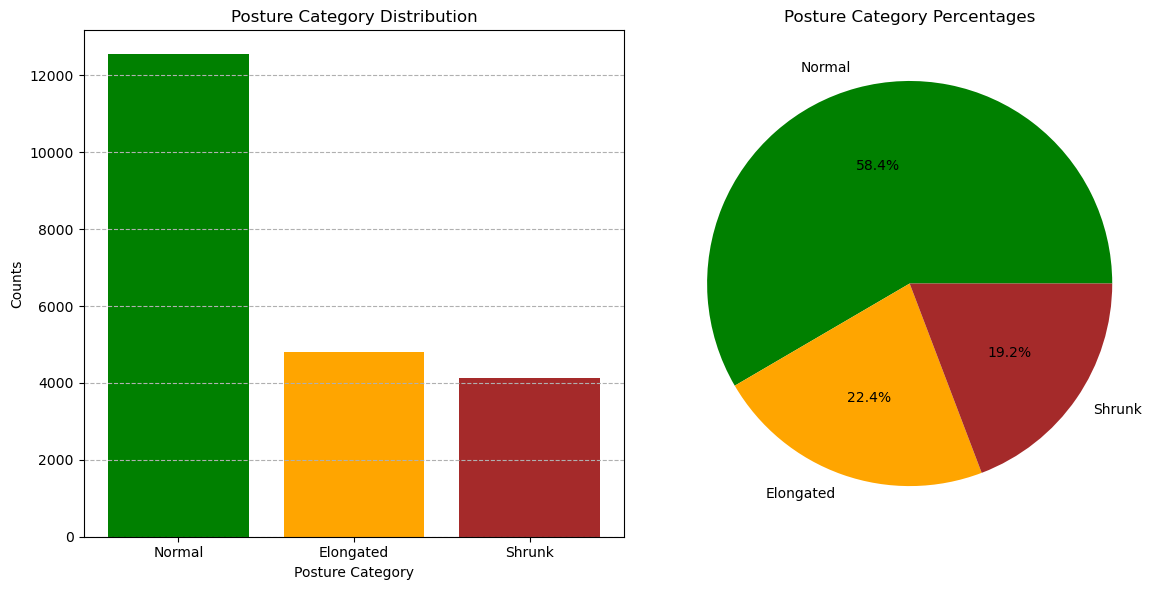

In [122]:
# Calculate the combined counts
normal = normal1 + normal2
elongated = elongated1 + elongated2
shrunk = shrunk1 + shrunk2

# Create the combined plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of posture categories
axs[0].bar(labels,[normal, elongated, shrunk], color=['green', 'orange', 'brown'])
axs[0].set_xlabel('Posture Category')
axs[0].set_ylabel('Counts')
axs[0].set_title('Posture Category Distribution')
axs[0].grid(axis='y', linestyle='--')

# Create the pie chart for percentages
posture_percentages = [normal / (normal + elongated + shrunk) * 100,
                       elongated / (normal + elongated + shrunk) * 100,
                       shrunk / (normal + elongated + shrunk) * 100]
posture_labels = ['Normal', 'Elongated', 'Shrunk']
axs[1].pie(posture_percentages, labels=posture_labels, autopct='%1.1f%%', colors=['green', 'orange', 'brown'])
axs[1].set_title('Posture Category Percentages')

plt.tight_layout()
plt.show()


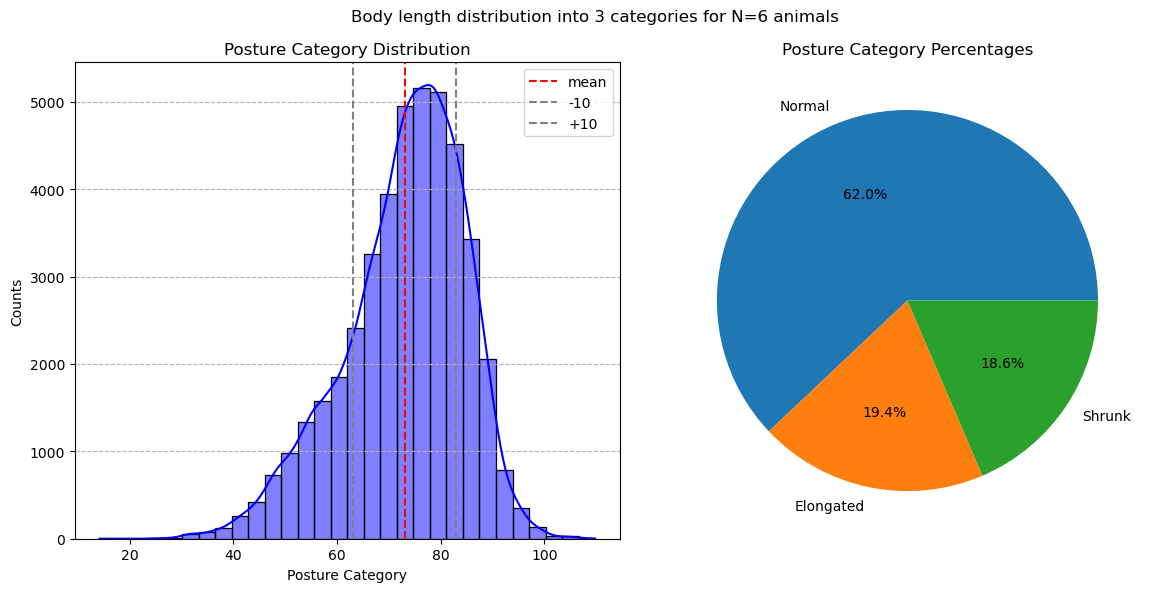

In [123]:
# Create a joined dataframe from indiv1_dist and indiv2_dist
combined_dist = np.concatenate((indiv1_dist, indiv2_dist, indiv3_dist,indiv4_dist))

# Calculate the combined counts
normal = normal1 + normal2 + normal3 + normal4
elongated = elongated1 + elongated2 + elongated3 + elongated4
shrunk = shrunk1 + shrunk2 +shrunk3 + shrunk4

# Create the combined plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the histogram for the distribution of posture categories
sns.histplot(data=combined_dist, bins=30, kde=True, color='blue', ax=axs[0])
axs[0].axvline(means, color='red', linestyle='--', label='mean')
axs[0].axvline(ranges[0], color='gray', linestyle='--', label='-10')
axs[0].axvline(ranges[1], color='gray', linestyle='--', label='+10')
axs[0].legend()
axs[0].set_xlabel('Posture Category')
axs[0].set_ylabel('Counts')
axs[0].set_title('Posture Category Distribution')
axs[0].grid(axis='y', linestyle='--')

fig.suptitle('Body length distribution into 3 categories for N=6 animals')

# Create the pie chart for percentages
posture_percentages = [normal / (normal + elongated + shrunk) * 100,
                       elongated / (normal + elongated + shrunk) * 100,
                       shrunk / (normal + elongated + shrunk) * 100]
posture_labels = ['Normal', 'Elongated', 'Shrunk']
axs[1].pie(posture_percentages, labels=posture_labels, autopct='%1.1f%%') 
axs[1].set_title('Posture Category Percentages')

plt.tight_layout()
plt.show()


In [124]:
# Count the categories in left and right chambers:

# FM left object right 1-2

left_normal1 = np.sum((categories1 == 0) & (100 <= indiv1_bp1_x) & (indiv1_bp1_x<= 350))
left_elongated1 = np.sum((categories1 == 1) & (100 <= indiv1_bp1_x) & (indiv1_bp1_x <= 350))
left_shrunk1 = np.sum((categories1 == -1) & (100 <= indiv1_bp1_x) & (indiv1_bp1_x <= 350))

center_normal1 = np.sum((categories1 == 0) & (350 < indiv1_bp1_x) & (indiv1_bp1_x < 550))
center_elongated1 = np.sum((categories1 == 1) & (350 < indiv1_bp1_x) & (indiv1_bp1_x < 550))
center_shrunk1 = np.sum((categories1 == -1) & (350 < indiv1_bp1_x) & (indiv1_bp1_x < 550))

right_normal1 = np.sum((categories1 == 0) & (550 <= indiv1_bp1_x) & (indiv1_bp1_x <= 800))
right_elongated1 = np.sum((categories1 == 1) & (550 <= indiv1_bp1_x) & (indiv1_bp1_x <= 800))
right_shrunk1 = np.sum((categories1 == -1) & (550 <= indiv1_bp1_x) & (indiv1_bp1_x <= 800))

left_normal2 = np.sum((categories2 == 0) & (100 <= indiv2_bp1_x) & (indiv2_bp1_x <= 350))
left_elongated2 = np.sum((categories2 == 1) & (100 <= indiv2_bp1_x) & (indiv2_bp1_x <= 350))
left_shrunk2 = np.sum((categories2 == -1) & (100 <= indiv2_bp1_x) & (indiv2_bp1_x <= 350))

center_normal2 = np.sum((categories2 == 0) & (350 < indiv2_bp1_x) & (indiv2_bp1_x < 550))
center_elongated2 = np.sum((categories2 == 1) & (350 < indiv2_bp1_x) & (indiv2_bp1_x < 550))
center_shrunk2 = np.sum((categories2 == -1) & (350 < indiv2_bp1_x) & (indiv2_bp1_x < 550))

right_normal2 = np.sum((categories2 == 0) & (550 <= indiv2_bp1_x) & (indiv2_bp1_x <= 800))
right_elongated2 = np.sum((categories2 == 1) & (550 <= indiv2_bp1_x) & (indiv2_bp1_x <= 800))
right_shrunk2 = np.sum((categories2 == -1) & (550 <= indiv2_bp1_x) & (indiv2_bp1_x <= 800))



In [125]:
# object left, FM right 3-4

left_normal3 = np.sum((categories3 == 0) & (100 <= indiv3_bp1_x) & (indiv3_bp1_x <= 350))
left_elongated3 = np.sum((categories3 == 1) & (100 <= indiv3_bp1_x) & (indiv3_bp1_x <= 350))
left_shrunk3 = np.sum((categories3 == -1) & (100 <= indiv3_bp1_x) & (indiv3_bp1_x <= 350))

center_normal3 = np.sum((categories3 == 0) & (350 < indiv3_bp1_x) & (indiv3_bp1_x < 550))
center_elongated3 = np.sum((categories3 == 1) & (350 < indiv3_bp1_x) & (indiv3_bp1_x < 550))
center_shrunk3 = np.sum((categories3 == -1) & (350 < indiv3_bp1_x) & (indiv3_bp1_x < 550))

right_normal3 = np.sum((categories3 == 0) & (550 <= indiv3_bp1_x) & (indiv3_bp1_x <= 800))
right_elongated3 = np.sum((categories3 == 1) & (550 <= indiv3_bp1_x) & (indiv3_bp1_x <= 800))
right_shrunk3 = np.sum((categories3 == -1) & (550 <= indiv3_bp1_x) & (indiv3_bp1_x <= 800))

left_normal4 = np.sum((categories4 == 0) & (100 <= indiv4_bp1_x) & (indiv4_bp1_x <= 350))
left_elongated4 = np.sum((categories4 == 1) & (100 <= indiv4_bp1_x) & (indiv4_bp1_x <= 350))
left_shrunk4 = np.sum((categories4 == -1) & (100 <= indiv4_bp1_x) & (indiv4_bp1_x <= 350))

center_normal4 = np.sum((categories4 == 0) & (350 < indiv4_bp1_x) & (indiv4_bp1_x < 550))
center_elongated4 = np.sum((categories4 == 1) & (350 < indiv4_bp1_x) & (indiv4_bp1_x < 550))
center_shrunk4 = np.sum((categories4 == -1) & (350 < indiv4_bp1_x) & (indiv4_bp1_x < 550))

right_normal4 = np.sum((categories4 == 0) & (550 <= indiv4_bp1_x) & (indiv4_bp1_x <= 800))
right_elongated4 = np.sum((categories4 == 1) & (550 <= indiv4_bp1_x) & (indiv4_bp1_x <= 800))
right_shrunk4 = np.sum((categories4 == -1) & (550 <= indiv4_bp1_x) & (indiv4_bp1_x <= 800))

In [129]:
# Define the labels for the x-axis
labels = ['Normal', 'Elongated', 'Shrunk']

# Combine object and familiar mouse zones

mouse_zone_normal = left_normal1 + left_normal2 + right_normal3 + right_normal4
mouse_zone_elongated = left_elongated1 + left_elongated2 + right_elongated3 + right_elongated4
mouse_zone_shrunk = left_shrunk1 + left_shrunk2 + left_shrunk3 + right_shrunk4 

center_normal = center_normal1 +  + center_normal3 + center_normal4
center_elongated = center_elongated1 + center_elongated2 + center_elongated3 + center_elongated4
center_shrunk = center_shrunk1 + center_shrunk2 + center_shrunk3 + center_shrunk4

object_zone_normal = right_normal1 + right_normal2 + left_normal3 +left_normal4
object_zone_elongated = right_elongated1 + right_elongated2 + left_elongated3 + left_elongated4
object_zone_shrunk = right_shrunk1 + right_shrunk2 + left_shrunk3 + left_shrunk4

# Define the counts for left and right chambers
mouse_counts = [mouse_zone_normal, mouse_zone_elongated, mouse_zone_shrunk]
object_counts = [object_zone_normal, object_zone_elongated, object_zone_shrunk]

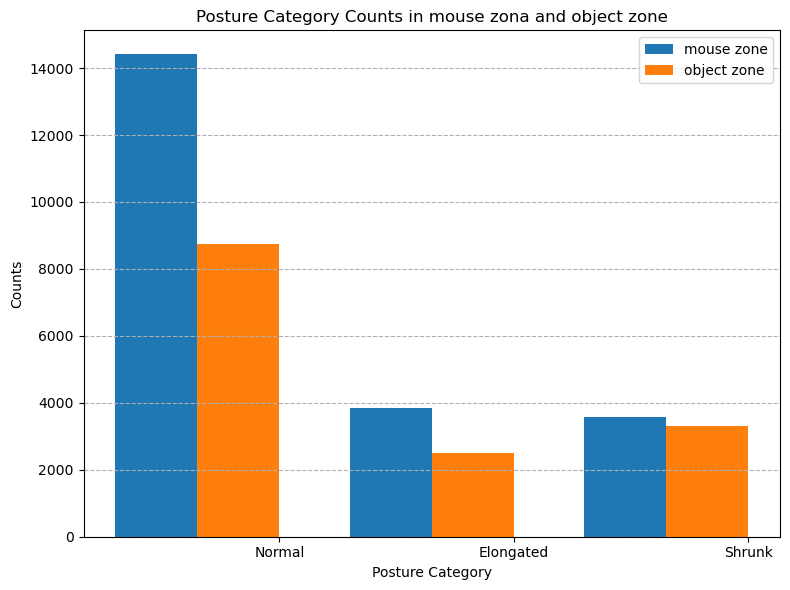

In [130]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Define the bar width
bar_width = 0.35

# Define the x positions for the bars
x_left = np.arange(len(labels))
x_right = x_left + bar_width

# Plot the bars for left and right chambers
ax.bar(x_left, mouse_counts, width=bar_width, label='mouse zone')
ax.bar(x_right, object_counts, width=bar_width, label='object zone')
#ax.bar(x_left + 2 * bar_width, left_counts, width=bar_width, label='Left Chamber (Mouse 2)')
#ax.bar(x_right + 2 * bar_width, right_count2, width=bar_width, label='Right Chamber (Mouse 2)')

# Add labels, title, and legend
ax.set_xlabel('Posture Category')
ax.set_ylabel('Counts')
ax.set_title('Posture Category Counts in mouse zona and object zone')
ax.set_xticks(x_left + 1.5 * bar_width)
ax.set_xticklabels(labels)
ax.legend()

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Display the plot
plt.tight_layout()
plt.show()


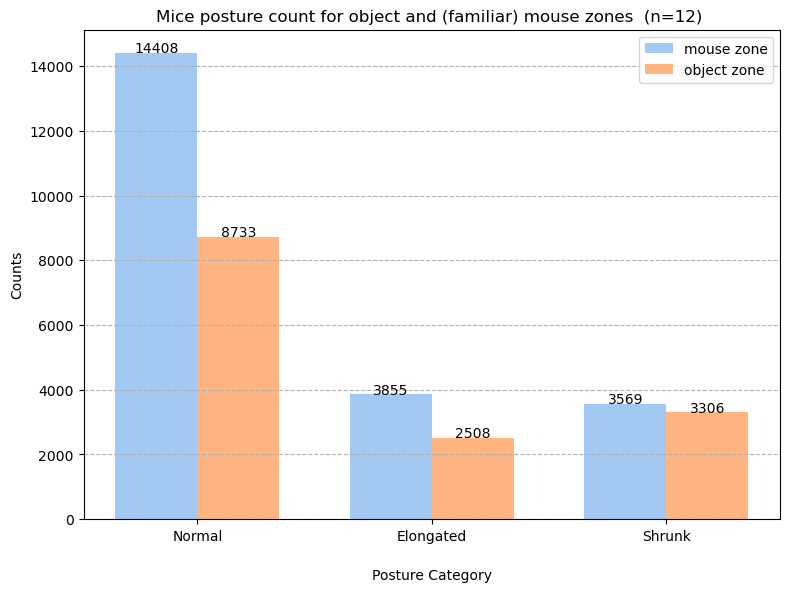

In [133]:

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Define the bar width
bar_width = 0.35

# Define the x positions for the bars
x_left = np.arange(len(labels))
x_right = x_left + bar_width

# Define the pastel color palette
colors = sns.color_palette('pastel')

# Plot the bars for left and right chambers
ax.bar(x_left, mouse_counts, width=bar_width, label='mouse zone', color=colors[0])
ax.bar(x_right, object_counts, width=bar_width, label='object zone', color=colors[1])

# Add labels, title, and legend
ax.set_xlabel('Posture Category')
ax.set_ylabel('Counts')
ax.set_title('Mice posture count for object and (familiar) mouse zones  (n=12) ')

# Rotate the x-axis tick labels
ax.set_xticks(x_left + 0.5 * bar_width)
ax.set_xticklabels(labels, rotation=0)  
for i, count in enumerate(mouse_counts):
    ax.text(x_left[i], count + 5, str(count), ha='center', color='black')

for i, count in enumerate(object_counts):
    ax.text(x_right[i], count + 5, str(count), ha='center', color='black')


ax.legend()

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Adjust the x-label position
ax.xaxis.set_label_coords(0.5, -0.1)  # Adjust the x-label position

# Display the plot
plt.tight_layout()
plt.show()


okay, now it works well, so I will add the mice, where the arena setting was the following: object zona on the left hand side and mouse zone on the right hand side, and then merge the data accordingly, so I could plot the same sociability plots, but for all control animals n=12

In [31]:
sociability_control_O_FM

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
416                                                    267.554    167.075   
417                                                    271.671    173.877   
418                                                    280.782    183.512   
419                                                    280.230    192.053   
420                                                    280.697    195.842   
...                                                        ...        ...   
8733                                                   504.271    708.515   
8734                                                   505.621    715.586   
8735                                                   501.912    708.315   
8736                                                   499.469    710.385   
8737                                                   499.312    717.167   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
416                1.0  251.061  157.128        1.0  271.225  153.138   
417                1.0  255.826  163.269        1.0  275.001  159.167   
418                1.0  263.727  170.383        1.0  284.074  168.739   
419                1.0  268.646  178.910        1.0  285.137  177.277   
420                1.0  269.281  184.577        1.0  289.293  172.845   
...                ...      ...      ...        ...      ...      ...   
8733               1.0  501.398  726.457        1.0  484.773  715.830   
8734               1.0  501.198  727.611        1.0  482.846  714.439   
8735               1.0  500.300  726.805        1.0  481.222  715.784   
8736               1.0  499.547  727.491        1.0  477.505  718.406   
8737               1.0  499.239  728.661        1.0  478.156  718.996   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
416                1.0  256.286  ...         1.0  514.012  603.121      1.000   
417                1.0  263.994  ...         1.0  523.135  618.788      1.000   
418                1.0  268.825  ...         1.0  524.455  620.907      1.000   
419                1.0  269.584  ...         1.0  517.134  629.960      1.000   
420                1.0  271.858  ...         1.0  512.079  632.546      1.000   
...                ...      ...  ...         ...      ...      ...        ...   
8733               1.0  486.883  ...         1.0  573.360  281.013      0.999   
8734               1.0  486.804  ...         1.0  571.542  283.167      0.999   
8735               1.0  486.853  ...         1.0  571.980  285.355      0.996   
8736               1.0  486.472  ...         1.0  571.991  285.311      0.992   
8737               1.0  486.845  ...         1.0  571.614  285.487      0.997   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
416          516.619  582.602      1.000  519.315  560.118        1.0  
417          523.618  599.536      1.000  529.834  578.977        1.0  
418          525.476  601.680      1.000  537.970  575.031        1.0  
419          516.415  607.59

### it looks fine for sociability, so I will do the same, but for the discrimination dataset and the zones will be familiar mouse zone and novel mouse zone